It is a classification problem where we have to predict whether a loan would be approved or not. 

# Problem statement 

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

Classification can be of two types:

Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.
Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

# Hypothesis generation

This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

Salary: Applicants with high income should have more chances of loan approval.
Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
Loan term: Loan for less time period and less amount should have higher chances of approval.
EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

# Loading the data 

In [1]:
#Loading packages :
import numpy as np                  #for numerical calculations
import pandas as pd 
import seaborn as sns               #for data visualization
import matplotlib.pyplot as plt     #for plotting graphs
%matplotlib inline                  
#To see plots in jupyter notebook itself

import warnings                     #to ignore any warnings
warnings.filterwarnings("ignore")

import os

In [2]:
#Loading the data :
os.listdir()                       #which directory we are in 
train1_original=pd.read_csv("train.csv")     #train data is used to train the model on which it will predict.(consist of independent variable+target variable)
test1_original=pd.read_csv("test.csv")       #test data consist of indpendent variable + target variable.we will use this data to predcit our model to find target variable.

train=train1_original.copy()
test=test1_original.copy()

# Understanding the data 

In [3]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


# Univariate analysis 

In [7]:
#analysing  independent(categorical) variable: loan status/gender/married/self_employed/credit_history)
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


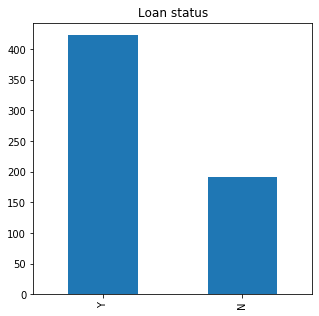

In [8]:
print(train['Loan_Status'].value_counts().plot.bar(figsize=(5,5), title= 'Loan status'))

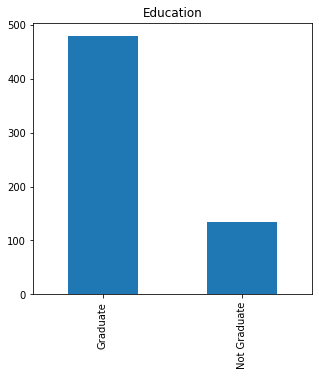

In [9]:
#analysing independent(ordinal) variable: --eduction/dependent/property area
train['Education'].value_counts().plot.bar(figsize=(5,5),title='Education')

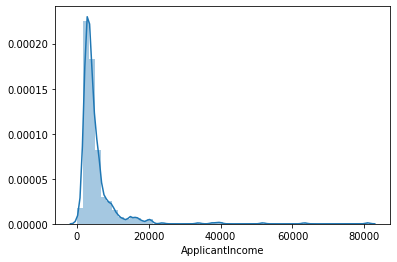

In [10]:
#analysing numerical values :
sns.distplot(train['ApplicantIncome'])

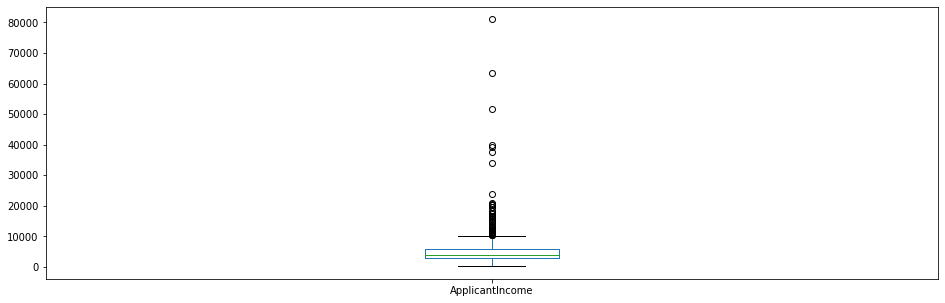

In [11]:

train['ApplicantIncome'].plot.box(figsize=(16,5))

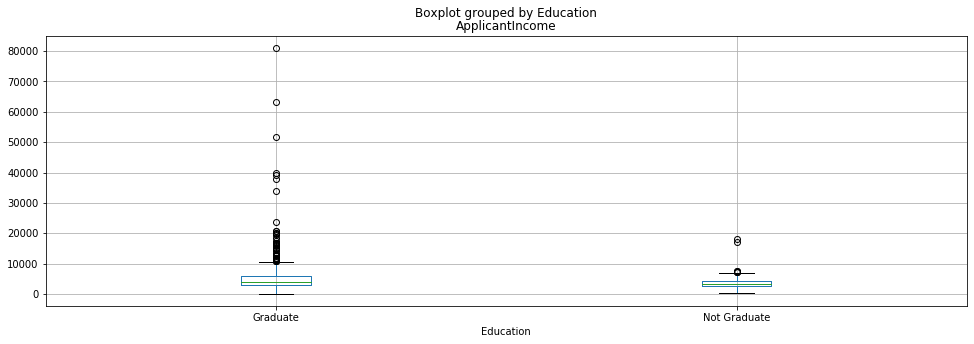

In [12]:
#grouping them by eduction
train.boxplot(figsize=(16,5),column='ApplicantIncome',by='Education')

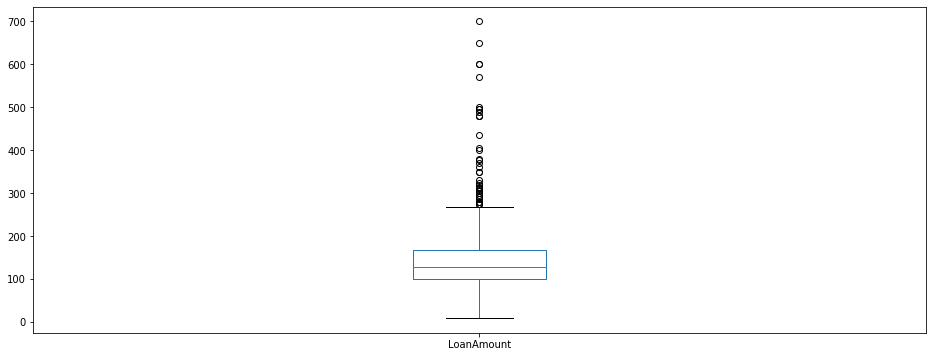

In [13]:
train['LoanAmount'].plot.box(figsize=(16,6))

In [14]:
#their are outliers and not ormal distribution.

# Bivariate analysis :

In [15]:
#now we will analyse two variables relatability - In hypothesis we analysed :
#low loan amount - high chances of loan.
#repaid credit history - high chances.
#high income - high chances.
#Loan amount term more - high chances.

In [16]:
print(train.columns)
train.dtypes

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
train['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [18]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


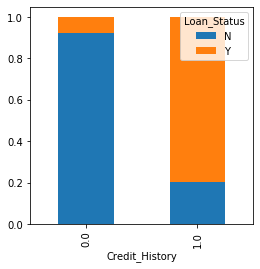

In [19]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

In [20]:
#therefore ,people with credit history =1 have more chances.

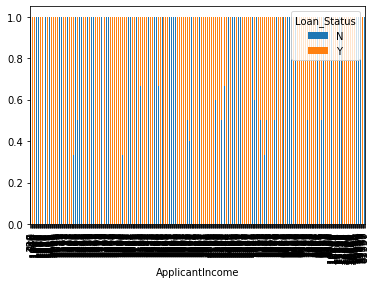

In [21]:
Income_bin=pd.crosstab(train['ApplicantIncome'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

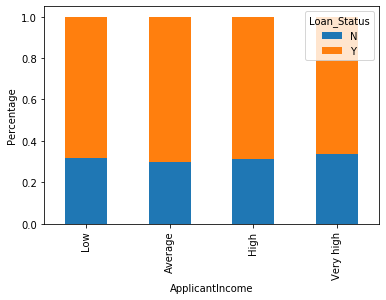

In [22]:
#hence,we cant analyse int/float variable using above method as it doesnot only have 0 and 1 nbut all other integer.
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
#now e can follow crosstab as we only have 4 values-low,average--
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

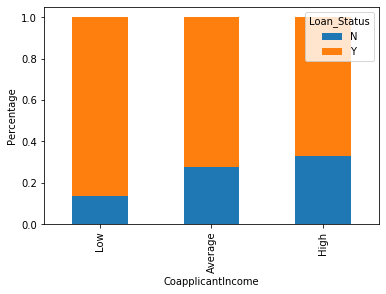

In [23]:
#hence,we see that ApplicantIncome doesnt affect loan status.Hence,our hypothesis was wrong.
#We will analyze the coapplicant income and loan amount variable in similar manner.
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

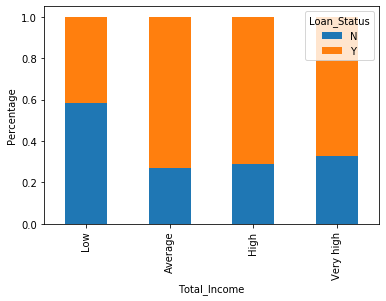

In [24]:
#It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. 
#The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income
#for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will
#combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

#Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

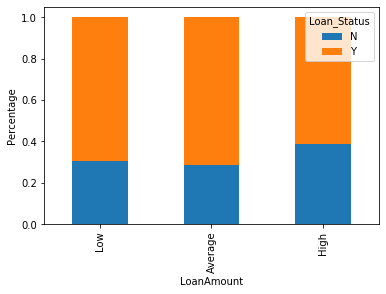

In [25]:
#Let’s visualize the Loan amount variable.

bins=[0,100,200,700]
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount') 
plt.ylabel('Percentage')

#Getting data ready for logistic regression

In [26]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average


In [27]:
#logistic regression model deals with only numerical values.

#Let us drop the bins we created for exploration part.
train=train.drop(['Income_bin','Total_Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income'],axis=1)

#drop the 3+ in dependent column and replace it with 3.
train['Dependents'].replace('3+',3,inplace=True)

#convert N-0 and Y-1 in target variable .
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [28]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


Analysing every correlation throughmap heatmap :

 Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

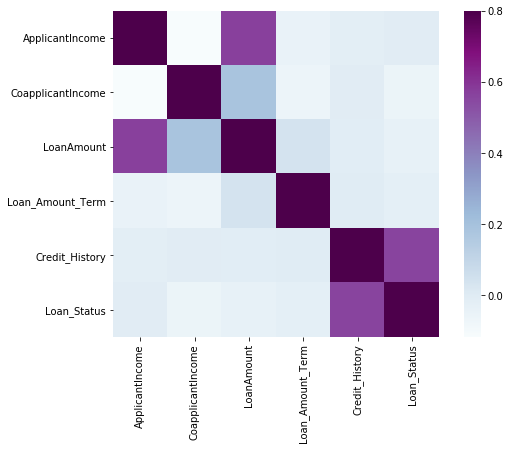

In [29]:
matrix = train.corr() 
fig, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [30]:
#Their is a strong correlation between LoanAmount-ApplicantIncome , credithistory-loanstatus , loanAmount-coApplicantIncome

# Missing value impute

In [31]:
#After exploring all the variables in our data, we can now impute the missing values because missing 
#data and outliers can have adverse effect on the model performance.

In [32]:
#Let’s list out feature-wise count of missing values.
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
#There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

#We will treat the missing values in all the features one by one.

#we can consider these methods to fill the missing values:
#--For numerical variables: imputation using mean or median
#--For categorical variables: imputation using mode

In [34]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [35]:
#for gender, married, dependent, self_employed ----fill by mode.
train["Gender"].fillna(train['Gender'].mode()[0],inplace=True)

train["Married"].fillna(train['Married'].mode()[0],inplace=True)
train["Dependents"].fillna(train['Dependents'].mode()[0],inplace=True)
train["Self_Employed"].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [36]:
#for loan amount term---fill by mean/median
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
train['Loan_Amount_Term'].fillna(train["Loan_Amount_Term"].median(),inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Credit_History'].fillna(train['Credit_History'].median(),inplace=True)

In [38]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].median(), inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [40]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Treatment

In [41]:
#outlier -- a very high/low values as compared to series values.Thus,it always stands out.
#it affects mean and std alot.Thus, affecting distribution alot.


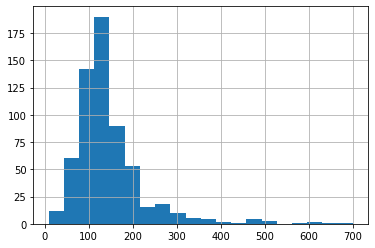

In [42]:
train['LoanAmount'].hist(bins=20)

In [43]:
#Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. 
#This is called right skewness. One way to remove the skewness is by doing the log transformation.
#As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 
#So, we get a distribution similar to normal distribution.

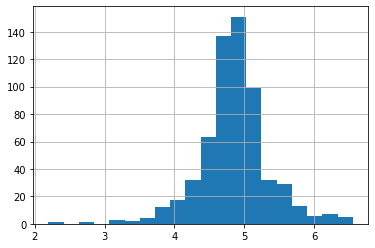

In [44]:
#Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [45]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


# Evaluation Metrics for Classification Problems

Classification problem, we can evaluate our models using any one of the following evaluation metrics:

Accuracy: 
Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. This is how a confusion matrix looks like:
True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
True Negative - Targets which are actually false(N) and we have predicted them false(N)
False Positive - Targets which are actually false(N) but we have predicted them true(T)
False Negative - Targets which are actually true(T) but we have predicted them false(N)
Using these values, we can calculate the accuracy of the model. The accuracy is given by:   
True Positive+True Negative/TP+TN+FP+FN

Precision: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.
Precision = TP / (TP + FP)

Recall(Sensitivity) - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’.
Recall = TP / (TP + FN)

Specificity - It is a measure of how many observations of false class are labeled correctly.
Specificity = TN / (TN + FP)

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

ROC curve
Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).
The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

# Model building

In [46]:
#Let us make our first model to predict the target variable.

Logistic Regression 
- which is used for predicting binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables
- Logistic Regression is a classification algorithim.
- Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
- This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

In [47]:
#We will use scikit-learn (sklearn) for making different models which is an open source library for Python. 
#It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

In [48]:
#Sklearn requires the target variable in a separate dataset. 
#So, we will drop our target variable from the train dataset and save it in another dataset.
# X = df se jo kaam ke hoo vo ese le lo['Features']
# y = df se sirf lo predict karna ho vo lo ['label']


X = train.drop('Loan_Status',1)  #take all independent variable except loan status.
y = train['Loan_Status']          #y always takes target variable-label.

In [49]:
#Now we will make dummy variables for the categorical variables. 
#Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. 
#Let us understand the process of dummies first:
    
#Consider the “Gender” variable. It has two classes, Male and Female.
#As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
#Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
#Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)


In [50]:
#Now we will train the model on training dataset and make predictions for the test dataset. 
#But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation.
#We can train the model on this train part and using that make predictions for the validation part. 
#In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

from sklearn.model_selection import train_test_split

# X_train, y_train, X_test, y_test = 'train_test_split' and 'cross_validation' method se split karo aur test_size define kar do
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)   #test size=20% will be test ,80% will be train.-changind this will also change accuracy.

In [51]:
#The dataset has been divided into training and validation part. 
#Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear') 
model.fit(X_train, y_train)
#Here the C parameter represents inverse of regularization strength. 
#Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.
#Smaller values of C specify stronger regularization.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#Let’s predict the Loan_Status for validation set and calculate its accuracy.

pred = model.predict(X_test)
model.score(X_test,y_test)
#So our predictions are almost 84% accurate, i.e. we have identified 84% of the loan status correctly.

0.7967479674796748

In [53]:
#using random forest :

- RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
- For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
- Final prediction can be a function of all the predictions made by the individual learners.
- In case of regression problem, the final prediction can be mean of all the predictions.

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1, max_depth=10)     
model.fit(X_train,y_train)     
pred_test = model.predict(X_test)     
score = accuracy_score(y_test,pred_test)     
print('accuracy_score',score) 

accuracy_score 0.7642276422764228


In [55]:
#using decision tree : 

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [56]:
model = tree.DecisionTreeClassifier(random_state=1)      
model.fit(X_train,y_train)     
pred_test = model.predict(X_test)     
score = accuracy_score(y_test,pred_test)     
print('accuracy_score',score) 

NameError: name 'tree' is not defined

In [ ]:
#using xgboost:

XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions. It’s a boosting algorithm and you may refer the below article to know more about boosting:https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

n_estimator: This specifies the number of trees for the model.
max_depth: We can specify maximum depth of a tree using this parameter.

In [ ]:
pip install  XGBClassifier

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50, max_depth=4) 
model.fit(X_train,y_train)     
pred_test = model.predict(X_test)     
score = accuracy_score(y_test,pred_test)     
print('accuracy_score',score) 

In [ ]:
#So , the best accuracy we got was from logistic regression model.